# **INTRODUCTION**

We have a data which classified if Customer can have a Loan or not according to features in it. We will try to use this data to create a model which tries predict if a Customer has this Loan or not. We will use logistic regression (classification) algorithm , K Nearest Neighbors , Support Vector Machine , Naive Bayes and Random Forest .

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./datas"))

# Any results you write to the current directory are saved as output.

['bankfullcsv']


# ****Read Data****

In [2]:
# We are reading our data
df = pd.read_csv("./datas/bank-full.csv")

In [3]:
# First 10 rows of our data
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# I'm here Mapping data to convert values inside CVS which have yes or no to 1 and 0 respectively

In [4]:
df['default'] = df['default'].map( 
                   {'yes':1 ,'no':0}) 
df['housing'] = df['housing'].map( 
                   {'yes':1 ,'no':0}) 
df['loan'] = df['loan'].map( 
                   {'yes':1 ,'no':0}) 
df['Target'] = df['Target'].map( 
                   {'yes':1 ,'no':0}) 

In [5]:
# First 5 rows of our data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


# Data Exploration

In [6]:
df.Target.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [7]:
df.loan.value_counts()

0    37967
1     7244
Name: loan, dtype: int64

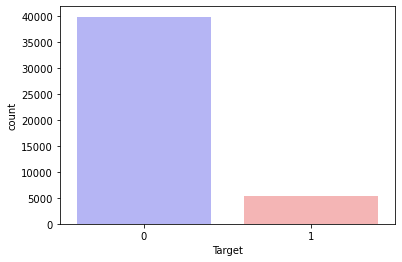

In [8]:
sns.countplot(x="Target", data=df, palette="bwr")
plt.show()

In [9]:
countNoLoan = len(df[df.Target == 0])
countHaveLoan = len(df[df.Target == 1])
print("Percentage of Customer can't Have a Loan: {:.2f}%".format((countNoLoan / (len(df.Target))*100)))
print("Percentage of Customer can Have a Loan: {:.2f}%".format((countHaveLoan / (len(df.Target))*100)))

Percentage of Customer can't Have a Loan: 88.30%
Percentage of Customer can Have a Loan: 11.70%


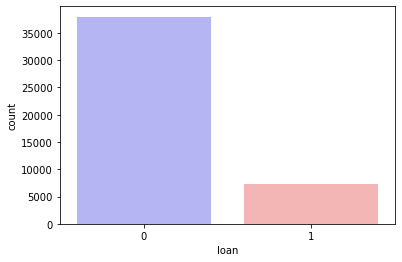

In [10]:
sns.countplot(x="loan", data=df, palette="bwr")
plt.show()

In [11]:
countNANLoan = len(df[df.loan == 0])
countOKLoan = len(df[df.loan == 1])
print("Percentage of Customer can't Have a Loan: {:.2f}%".format((countNoLoan / (len(df.loan))*100)))
print("Percentage of Customer can Have a Loan: {:.2f}%".format((countHaveLoan / (len(df.loan))*100)))

Percentage of Customer can't Have a Loan: 88.30%
Percentage of Customer can Have a Loan: 11.70%


In [12]:
df.groupby('Target').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
Target,,,,,,,,,,
0,40.838986,0.019112,1303.714969,0.581008,0.169330,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,0.009832,1804.267915,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354


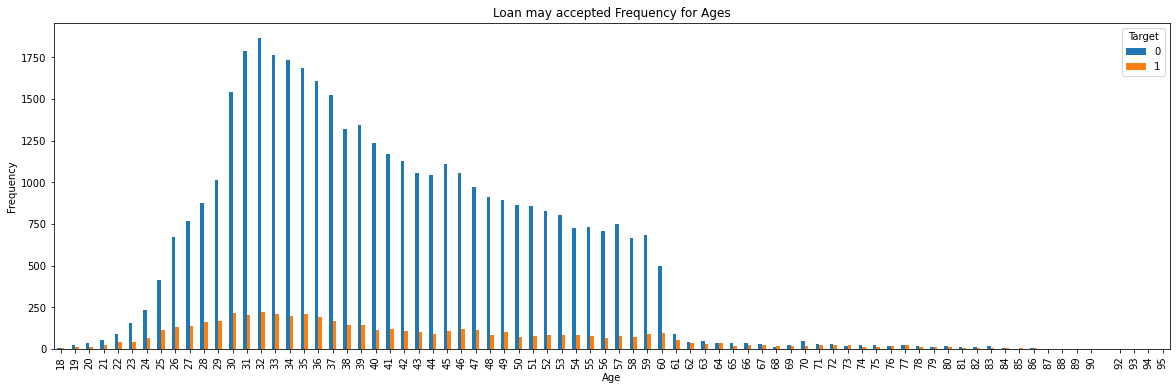

In [13]:
pd.crosstab(df.age,df.Target).plot(kind="bar",figsize=(20,6))
plt.title('Loan may accepted Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

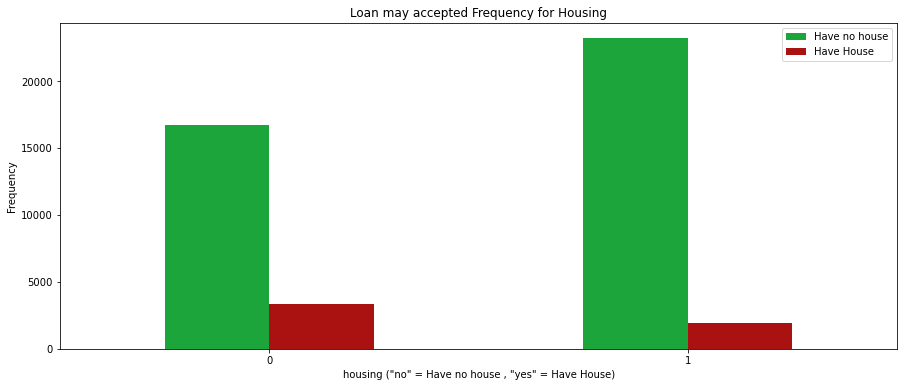

In [14]:
pd.crosstab(df.housing,df.Target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Loan may accepted Frequency for Housing')
plt.xlabel('housing ("no" = Have no house , "yes" = Have House)')
plt.xticks(rotation=0)
plt.legend(["Have no house", "Have House"])
plt.ylabel('Frequency')
plt.show()

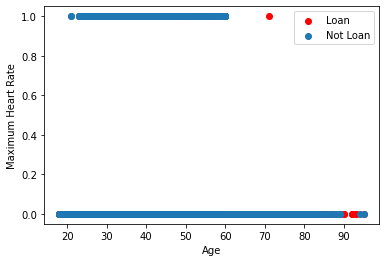

In [15]:
plt.scatter(x=df.age[df.Target== 1], y=df.default[(df.Target== 1)], c="red")
plt.scatter(x=df.age[df.Target== 0], y=df.default[(df.Target== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

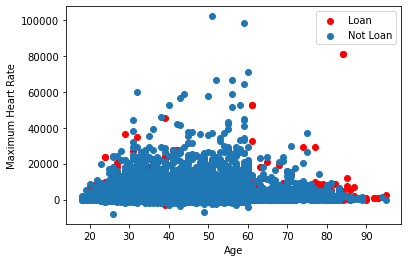

In [16]:
plt.scatter(x=df.age[df.Target== 1], y=df.balance[(df.Target== 1)], c="red")
plt.scatter(x=df.age[df.Target== 0], y=df.balance[(df.Target== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

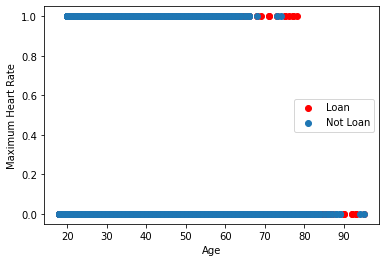

In [17]:
plt.scatter(x=df.age[df.Target== 1], y=df.housing[(df.Target== 1)], c="red")
plt.scatter(x=df.age[df.Target== 0], y=df.housing[(df.Target== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

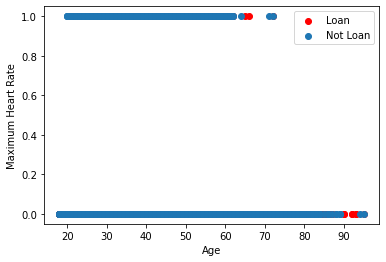

In [18]:
plt.scatter(x=df.age[df.Target== 1], y=df.loan[(df.Target== 1)], c="red")
plt.scatter(x=df.age[df.Target== 0], y=df.loan[(df.Target== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

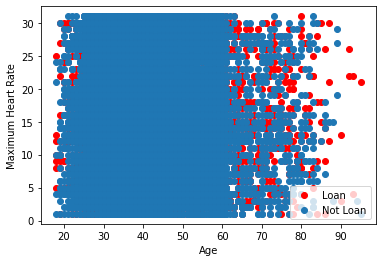

In [19]:
plt.scatter(x=df.age[df.Target== 1], y=df.day[(df.Target== 1)], c="red")
plt.scatter(x=df.age[df.Target== 0], y=df.day[(df.Target== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

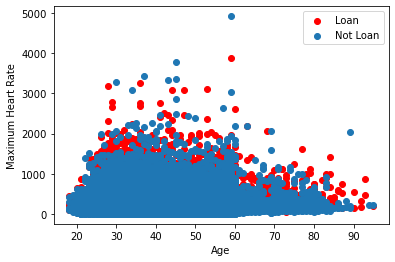

In [20]:
plt.scatter(x=df.age[df.Target== 1], y=df.duration[(df.Target== 1)], c="red")
plt.scatter(x=df.age[df.Target== 0], y=df.duration[(df.Target== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

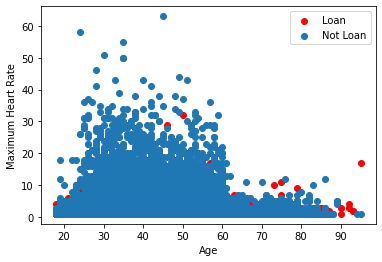

In [21]:
plt.scatter(x=df.age[df.Target== 1], y=df.campaign[(df.Target== 1)], c="red")
plt.scatter(x=df.age[df.Target== 0], y=df.campaign[(df.Target== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

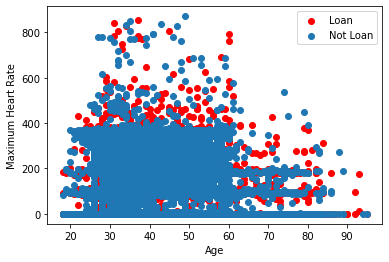

In [22]:
plt.scatter(x=df.age[df.Target== 1], y=df.pdays[(df.Target== 1)], c="red")
plt.scatter(x=df.age[df.Target== 0], y=df.pdays[(df.Target== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

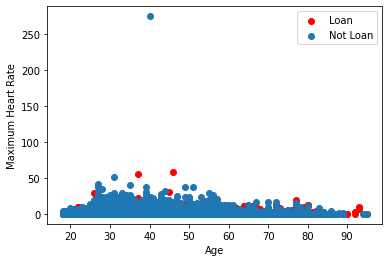

In [23]:
plt.scatter(x=df.age[df.Target== 1], y=df.previous[(df.Target== 1)], c="red")
plt.scatter(x=df.age[df.Target== 0], y=df.previous[(df.Target== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [24]:
df = df.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


# Creating Model for Logistic Regression

In [25]:
y = df.Target.values
x_data = df.drop(['Target'], axis = 1)

# Normalize Data

In [26]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

**We will split our data. 80% of our data will be train data and 20% of it will be test data.**

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [28]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

**Let's say weight = 0.01 and bias = 0.0**

In [29]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [30]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [31]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [32]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [33]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [34]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3424734759738029


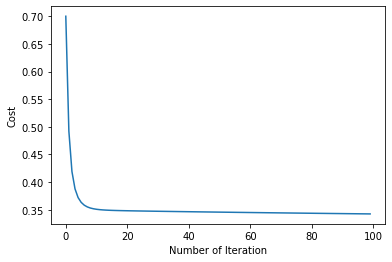

Manuel Test Accuracy: 88.25%


In [35]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

Manuel Test Accuracy is **88.25%**

**Let's find out sklearn's score.**

# Sklearn Logistic Regression

In [36]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.81%


Test Accuracy is 88.81% 

Accuracy increases due to the Sklearn Modification and improvements

# K-Nearest Neighbour (KNN) Classification

In [37]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} KNN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 KNN Score: 88.37%


**Try to find best k value to improve our accuracy**

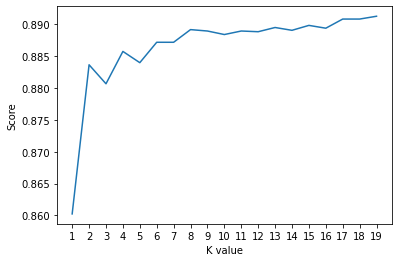

Maximum KNN Score is 89.13%


In [38]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

**We notes now that our Accuracy increases to 89.13%**

# Support Vector Machine (SVM) Algorithm

In [39]:
from sklearn.svm import SVC

In [40]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.33%


# Naive Bayes Algorithm

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.44%


# Random Forest Classification

In [42]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 89.58%


# Comparing Models

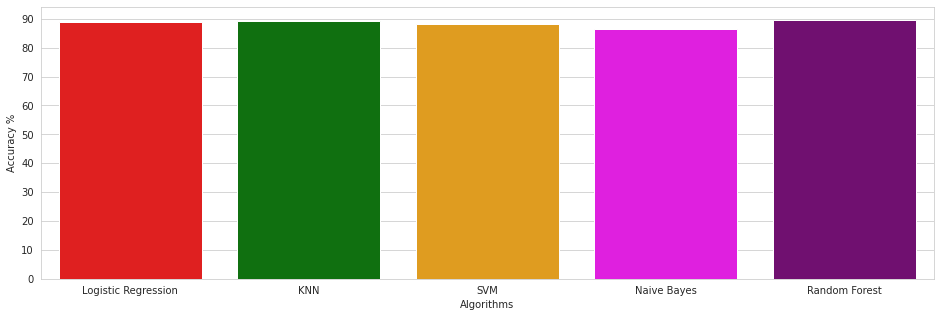

In [43]:
colors = ["Red", "green", "orange", "magenta","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Confusion Matrix

In [44]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [45]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_rf = confusion_matrix(y_test,y_head_rf)


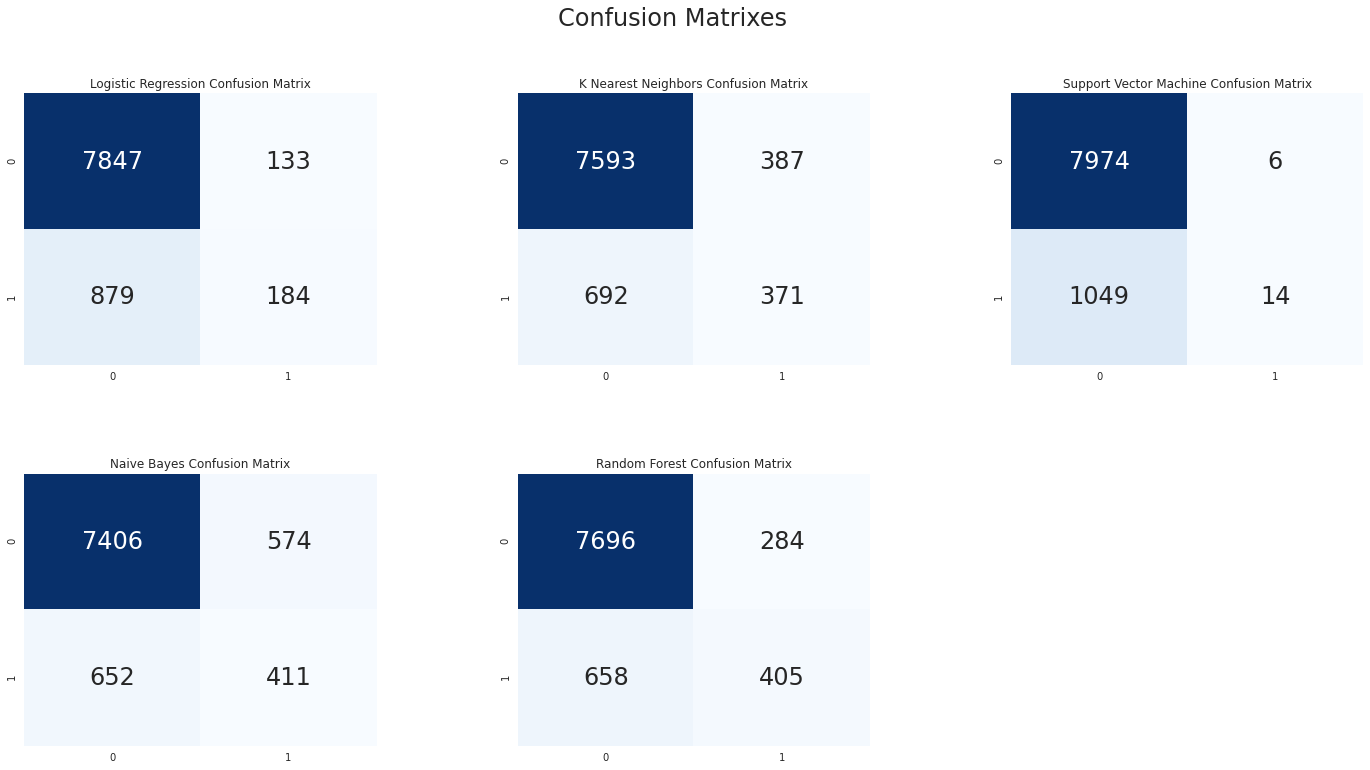

In [46]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()